# Step0: Problem Statement
This is a dataset about online news popularity from UCI.
https://archive.ics.uci.edu/ml/datasets/online+news+popularity
   
    
## Topic2
      Predict number of shares of the news proposed before it goes online
      (Regression, Adboost, RegressinTree )
      
## Key Methods
      1. Check the feature statistics
      2. Log outcome first and then transformed it back
      3. Separate the norm and crazy group. By cutoff of share ______.
      4. Normalize all numerical features
      5. Correlation Test: eliminate the highly correlated ones...
      
      https://rstudio-pubs-static.s3.amazonaws.com/157053_f1c97373ae8e4240b9686d2bc6bbc08c.html?fbclid=IwAR1G1PaalJiP14as0r1w85sVd8DKiObb-aOBFXo3yEAEw59dc6-966dEV4E

# Step1: Load the online news dataset

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import statistics as st
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
import time

df = pd.read_csv("OnlineNewsPopularity.csv")
df = df.drop('url',1)
df['log_shares'] = np.log(df[' shares'])
#df.head()

# Step2: EDA & Data Preprocessing

In [101]:
# Check suspicious zero values
#df.describe()
df_inspect = df[df[' n_tokens_content']==0]
df = df[df[' n_tokens_content'] != 0]

In [102]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,360.385747,10.382419,563.295375,0.565049,1.027065,0.710336,11.217872,3.394769,4.563061,1.263786,...,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930,3355.360398,7.469288
std,212.773031,2.113800,468.299538,3.573022,5.307978,3.312293,11.340580,3.869773,8.295365,4.164896,...,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636,11585.968776,0.925483
min,8.000000,2.000000,18.000000,0.114964,1.000000,0.119134,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,174.000000,9.000000,259.000000,0.477419,1.000000,0.632588,5.000000,1.000000,1.000000,0.000000,...,0.600000,-0.331532,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000,6.851185
50%,347.000000,10.000000,423.000000,0.542986,1.000000,0.693727,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000,7.244228
75%,547.000000,12.000000,729.000000,0.611111,1.000000,0.756944,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.193415,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000,7.901007
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,13.645078


In [103]:
#check for outliers (too high or low), use [mean + 3 std] as a upper_threshold
#df.describe()
has_outlier = [' n_tokens_content',' n_unique_tokens',' n_non_stop_words',' n_non_stop_unique_tokens',' num_hrefs',
              ' num_self_hrefs',' num_imgs',' num_videos',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',
               ' kw_max_avg',' kw_avg_max',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',
               ' self_reference_avg_sharess',' shares']
def set_threshold(df,col):
    temp = df[col].mean()+3*df[col].std()
    return temp

upper_threshold = list()
for i in range(len(has_outlier)):
    upper_threshold.append(set_threshold(df,has_outlier[i]))
    i = i+1

In [104]:
# eliminate outliers
for i in range(len(has_outlier)):
    df = df[df[has_outlier[i]] < upper_threshold[i]]

In [105]:
#df.iloc[:,50:60].describe()
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,33873.000000,33873.000000,33873.000000,33873.000000,3.387300e+04,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,...,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000,33873.000000
mean,361.513595,10.362029,502.802084,0.553510,1.000000e+00,0.701670,9.744634,2.959968,3.539456,0.681605,...,0.766628,-0.263191,-0.520235,-0.112798,0.275147,0.068400,0.342920,0.151149,2633.344079,7.418750
std,214.584116,2.108726,342.397718,0.097108,4.076420e-09,0.093049,7.557532,2.443370,5.381933,1.700183,...,0.212942,0.121870,0.276764,0.095532,0.320384,0.259782,0.188703,0.222077,3734.767801,0.856511
min,8.000000,3.000000,18.000000,0.181818,9.999999e-01,0.253112,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,5.000000,1.609438
25%,171.000000,9.000000,252.000000,0.484932,1.000000e+00,0.641469,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.327010,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,934.000000,6.839476
50%,350.000000,10.000000,402.000000,0.548330,1.000000e+00,0.699074,7.000000,2.000000,1.000000,0.000000,...,0.800000,-0.252273,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1400.000000,7.244228
75%,552.000000,12.000000,666.000000,0.613718,1.000000e+00,0.760606,13.000000,4.000000,3.000000,1.000000,...,1.000000,-0.188021,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2600.000000,7.863267
max,731.000000,23.000000,1966.000000,1.000000,1.000000e+00,1.000000,45.000000,15.000000,29.000000,13.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,38000.000000,10.545341


#check for binary variables: weekday, channel by visualization (already done)
'''
   # Visualize the feature of different day of week
columns_day = data.columns.values[list(data.columns).index(' weekday_is_monday'):list(data.columns).index(' weekday_is_sunday')+1]
unpop=data[data[' shares']<1400]
pop=data[data[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values
    #figure: days
pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'gold',label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'g',label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 9)
pl.xlabel("Days of week", fontsize = 12)
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")

    # Visualize the feature of different channels
columns_channel = data.columns.values[list(data.columns).index( ' data_channel_is_lifestyle'):list(data.columns).index( ' data_channel_is_world')+1]
unpop_channel = unpop[columns_channel].sum().values
pop_channel = pop[columns_channel].sum().values
    #figure: channel 
pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over channels", fontsize = 16)
pl.bar(np.arange(len(columns_channel)), pop_channel, width = 0.3, align="center", color = 'gold',label = "popular")
pl.bar(np.arange(len(columns_channel)) - 0.3, unpop_channel, width = 0.3, align = "center", color = 'g',label = "unpopular")
pl.xticks(np.arange(len(columns_channel)), columns_channel)
pl.ylabel("Count", fontsize = 9)
pl.xlabel("Channel", fontsize = 12)
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("channel.pdf")

pl.close('all')

'''

In [107]:

from sklearn.preprocessing import MinMaxScaler
# normalization of numerical attribues
scaler = MinMaxScaler()
numerical = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
        ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
        ' num_self_hrefs', ' num_imgs', ' num_videos',
        ' average_token_length', ' num_keywords',' kw_min_min',
        ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
        ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
        ' self_reference_min_shares', ' self_reference_max_shares',
        ' self_reference_avg_sharess', 
        ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
        ' global_subjectivity', ' global_sentiment_polarity',
        ' global_rate_positive_words', ' global_rate_negative_words',
        ' rate_positive_words', ' rate_negative_words',
        ' avg_positive_polarity', ' min_positive_polarity',
        ' max_positive_polarity', ' avg_negative_polarity',
        ' min_negative_polarity', ' max_negative_polarity',
        ' title_subjectivity', ' title_sentiment_polarity',
        ' abs_title_subjectivity', ' abs_title_sentiment_polarity']
df[numerical] = scaler.fit_transform(df[numerical])


### Feature selection
#co-linear test
corr_matrix = df[numerical].corr().abs()
high_corr_var=list(np.where(corr_matrix>0.8))
high_corr_ex=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

'''
i=0
high_corr=[]
for x in range(len(high_corr_var[0])):
    if high_corr_var[0][x] != high_corr_var[1][x] and high_corr_var[0][x] < high_corr_var[1][x]:
        high_corr.append([list(df.columns)[high_corr_var[0][x]],list(df.columns)[high_corr_var[1][x]]])
        i=1+1

'''
high_corr_ex

In [108]:
df[' shares'].describe() #original

count    33873.000000
mean      2633.344079
std       3734.767801
min          5.000000
25%        934.000000
50%       1400.000000
75%       2600.000000
max      38000.000000
Name:  shares, dtype: float64

In [109]:
# Take only for this group:
df=df[df[' shares']<5000]
#df=df[df[' shares']>5000]
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,...,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.00000,29991.000000,29991.000000
mean,359.319062,0.368482,0.248978,0.453855,0.946742,0.601084,0.211875,0.197161,0.116046,0.050307,...,0.763613,0.738784,0.482696,0.888035,0.270118,0.532928,0.686357,0.14768,1591.239572,7.195864
std,215.892735,0.105253,0.174178,0.117813,0.048839,0.123377,0.163329,0.162735,0.179511,0.126953,...,0.212937,0.120825,0.276934,0.094330,0.317211,0.127639,0.377861,0.21839,991.497384,0.603030
min,8.000000,0.000000,0.001540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,1.609438
25%,168.000000,0.300000,0.121663,0.370873,0.930705,0.521192,0.088889,0.066667,0.034483,0.000000,...,0.600000,0.675000,0.300000,0.875000,0.000000,0.500000,0.333333,0.00000,893.000000,6.794587
50%,345.000000,0.350000,0.198665,0.447169,0.959920,0.597640,0.155556,0.133333,0.034483,0.000000,...,0.800000,0.750000,0.500000,0.900000,0.100000,0.500000,1.000000,0.00000,1300.000000,7.170120
75%,552.000000,0.450000,0.331622,0.526077,0.978694,0.679074,0.266667,0.266667,0.103448,0.076923,...,1.000000,0.812500,0.700000,0.950000,0.500000,0.568182,1.000000,0.25000,2000.000000,7.600902
max,731.000000,0.850000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4900.000000,8.496990


In [110]:
df[' shares'].describe() #only left

count    29991.000000
mean      1591.239572
std        991.497384
min          5.000000
25%        893.000000
50%       1300.000000
75%       2000.000000
max       4900.000000
Name:  shares, dtype: float64

# Step3: 

In [111]:
y_pre1 = df['log_shares']
#y_pre2 = df[' shares']

"""
# method0
x_pre = df.drop([' shares','log_shares'],1)

# method2
yes = [' rate_positive_words',' LDA_00',' is_weekend',
       ' n_non_stop_unique_tokens',' data_channel_is_socmed',' rate_negative_words',' global_rate_positive_words',
        ' min_positive_polarity',' data_channel_is_tech',' global_rate_negative_words',' global_subjectivity',
       ' LDA_02',' data_channel_is_entertainment',' LDA_03',' LDA_01',' global_sentiment_polarity',' abs_title_subjectivity',' data_channel_is_bus',
       ' max_positive_polarity',' title_sentiment_polarity',' LDA_04',' title_subjectivity',' data_channel_is_lifestyle',' average_token_length',
       ' avg_negative_polarity',' abs_title_sentiment_polarity',' max_negative_polarity',' num_keywords',' avg_positive_polarity']
x_pre = df[yes]
"""
# method1
x_pre = df.drop(['log_shares',' shares',' weekday_is_saturday', ' weekday_is_sunday',
                 ' n_non_stop_words',' n_unique_tokens',
                            ' n_non_stop_words',' kw_avg_min',' kw_max_min',' kw_min_min',
                            ' self_reference_min_shares',' self_reference_avg_sharess',' rate_negative_words'],1)



In [112]:
x_pre.describe()

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,...,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.00000
mean,359.319062,0.368482,0.248978,0.601084,0.211875,0.197161,0.116046,0.050307,0.245792,0.689777,...,0.360138,0.099436,0.763613,0.738784,0.482696,0.888035,0.270118,0.532928,0.686357,0.14768
std,215.892735,0.105253,0.174178,0.123377,0.163329,0.162735,0.179511,0.126953,0.063150,0.210050,...,0.085198,0.070161,0.212937,0.120825,0.276934,0.094330,0.317211,0.127639,0.377861,0.21839
min,8.000000,0.000000,0.001540,0.000000,0.000000,0.000000,0.000000,0.000000,0.005535,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,168.000000,0.300000,0.121663,0.521192,0.088889,0.066667,0.034483,0.000000,0.202881,0.555556,...,0.307273,0.050000,0.600000,0.675000,0.300000,0.875000,0.000000,0.500000,0.333333,0.00000
50%,345.000000,0.350000,0.198665,0.597640,0.155556,0.133333,0.034483,0.000000,0.243689,0.666667,...,0.356783,0.100000,0.800000,0.750000,0.500000,0.900000,0.100000,0.500000,1.000000,0.00000
75%,552.000000,0.450000,0.331622,0.679074,0.266667,0.266667,0.103448,0.076923,0.285874,0.888889,...,0.408029,0.100000,1.000000,0.812500,0.700000,0.950000,0.500000,0.568182,1.000000,0.25000
max,731.000000,0.850000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Step4: Partition and Modeling

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [114]:
from sklearn.model_selection import train_test_split  
# Partition 
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_pre, y_pre1, test_size=0.2, random_state=123) #logged
#X_train2, X_test2, y_train2, y_test2 = train_test_split(x_pre, y_pre2, test_size=0.2, random_state=123) # orinigal

In [115]:
X_train1.describe()

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,...,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000,23992.000000
mean,359.711362,0.368625,0.248516,0.601474,0.211400,0.196988,0.116072,0.050116,0.245980,0.689327,...,0.359731,0.099409,0.762936,0.738306,0.482256,0.887566,0.269959,0.532925,0.686082,0.148383
std,216.175202,0.105014,0.174582,0.123836,0.162843,0.162139,0.179880,0.125791,0.063288,0.210336,...,0.085546,0.070001,0.213703,0.121558,0.277035,0.095492,0.316986,0.128232,0.377991,0.219299
min,8.000000,0.000000,0.001540,0.000000,0.000000,0.000000,0.000000,0.000000,0.005535,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,168.000000,0.300000,0.121150,0.521043,0.088889,0.066667,0.034483,0.000000,0.203169,0.555556,...,0.306945,0.050000,0.600000,0.675000,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000
50%,346.000000,0.350000,0.197125,0.597890,0.155556,0.133333,0.034483,0.000000,0.243697,0.666667,...,0.356171,0.100000,0.800000,0.749151,0.500000,0.900000,0.100000,0.500000,1.000000,0.000000
75%,553.000000,0.450000,0.330595,0.680088,0.266667,0.266667,0.103448,0.076923,0.286084,0.888889,...,0.407510,0.100000,1.000000,0.812500,0.700000,0.950000,0.500000,0.568182,1.000000,0.250000
max,731.000000,0.850000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'''coeff_df = pd.DataFrame(regressor.coef_, x_pre.columns, columns=['Coefficient'])  
coeff_df.sort_values(['Coefficient'])
'''


In [116]:
from sklearn import metrics  
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [117]:
lr = LinearRegression(fit_intercept=True)

train_error, test_error = calc_metrics(X_train1, y_train1, X_test1, y_test1, lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 0.314 | test error: 0.307
train/test: 1.0



'''
#to predict by model built

def to_pre_ori(learner,name_learner,X_test,y_testset):
#ex: to_pre(ADA_regr,"ADA",X_test,y_test)
    y_pred_original = learner.predict(X_test) 
    y_test_original = y_testset
    
    from sklearn import metrics  
    print('learner:',learner)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_original, y_pred_original))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test_original, y_pred_original))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_original, y_pred_original)))  
    print('\n')
    df_pred_real = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})  
    print(df_pred_real.head())
    
    #draw for norm
    pl.figure() #figsize = (13,5)
    y_test_original.plot(kind='hist', bins=100, color="gold")
    pl.title("y_test_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_test_distribution_"+name_learner+".pdf")
    
    pd.Series(y_pred_original).plot(kind='hist', bins=100, color="green",alpha=0.55)
    pl.title("(green)y_pred_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_pred_distribution_"+name_learner+".pdf")
    pl.close('all')
    
    
    return '''

In [149]:
y_test_ori = np.exp(y_test1)
import seaborn as sns
sns.set(style="whitegrid")

def num_abs_small(c,threshold):
    count = 0
    for num in c:
        if 0 < num < threshold or 0 > num > -threshold:
            count +=1
    return count

def to_pre_log(learner,name_learner,X_test,y_testset):#for y_testset = y_test1
    '''
    ex:
    to_pre(ADA_regr,"ADA",X_test,y_test)
    '''
    y_pred = learner.predict(X_test) 

    # turn logged back
    y_pred_original = np.exp(y_pred)
    
    from sklearn import metrics  
    print('learner:',learner)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ori, y_pred_original))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test_ori, y_pred_original))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ori, y_pred_original)))  

    error = y_test_ori - y_pred_original
    print('--- Error ---')
    print(error.describe())
    print('------')
    print('Error in +- 200:',num_abs_small(error,200))
    
    pl.figure()
    pl.xlim((-2000, +4000))
    pl.hist(error, normed=False, bins=30)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Real Shares - Predicted", fontsize = 9)
    pl.show()
    pl.close()
    
    df_pred = pd.DataFrame({'Actual_logged': y_testset, 'Predicted_logged': y_pred})  
    print(df_pred.head())
    print('\n')
    df_pred_real = pd.DataFrame({'Actual': y_test_ori, 'Predicted': y_pred_original})  
    print(df_pred_real.head())
    
    '''
    #draw for logged
    pl.figure() #figsize = (13,5)
    y_testset.plot(kind='hist', color="gold")
    pl.title("y_test_distribution_logged_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_test_distribution_logged_"+name_learner+".pdf")
    
    pd.Series(y_pred).plot(kind='hist', color="green",alpha=0.55)
    pl.title("(green)y_pred_distribution_logged_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_pred_distribution_logged_"+name_learner+".pdf")

    #draw for norm
    pl.figure() #figsize = (13,5)
    y_test_original.plot(kind='hist', bins=100, color="gold")
    pl.title("y_test_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_test_distribution_"+name_learner+".pdf")
    
    pd.Series(y_pred_original).plot(kind='hist', bins=100, color="green",alpha=0.55)
    pl.title("(green)y_pred_distribution_"+name_learner, fontsize = 16)
    pl.ylabel("Count", fontsize = 9)
    pl.xlabel("Number of shares", fontsize = 9)
    pl.tight_layout()
    pl.savefig("y_pred_distribution_"+name_learner+".pdf")
    pl.close('all')
    
    '''
    
    return 


# Benchmark for prediction: using Mean


Benchmark performance:
Mean Absolute Error: 769.7246607553967
Mean Squared Error: 986265.7995220824
Root Mean Squared Error: 993.1091579086775
--- Error ---
count    5999.000000
mean        0.605706
std       993.191756
min     -1563.118414
25%      -701.618414
50%      -291.118414
75%       408.881586
max      3308.881586
Name: log_shares, dtype: float64
Error in +- 200: 846


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


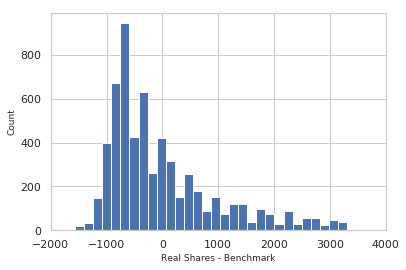

In [150]:
benchmark = np.repeat(np.exp((y_train1)).mean(), len(y_test1))
print('Benchmark performance:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ori, benchmark))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ori, benchmark))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ori, benchmark)))  

error_ben= y_test_ori - benchmark
print('--- Error ---')
print(error_ben.describe())
print('------')
print('Error in +- 200:',num_abs_small(error_ben,200))

pl.figure()
pl.xlim((-2000, +4000))
pl.hist(error_ben, normed=False, bins=30)
pl.ylabel("Count", fontsize = 9)
pl.xlabel("Real Shares - Benchmark", fontsize = 9)
pl.show()
pl.close()

In [151]:
benchmark[1]

1591.1184144714905

learner: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error: 663.0750927192652
Mean Squared Error: 923868.7451394987
Root Mean Squared Error: 961.1809117640126
--- Error ---
count    5999.000000
mean      213.989080
std       937.135963
min     -2078.461692
25%      -399.070894
50%       -66.009316
75%       559.065932
max      3902.655692
Name: log_shares, dtype: float64
Error in +- 200: 1456


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


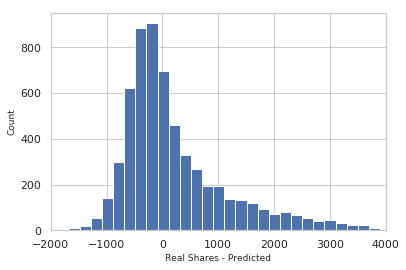

       Actual_logged  Predicted_logged
14634       6.862758          7.225580
659         8.101678          7.690504
3354        8.411833          7.411266
7560        7.649693          7.235622
38610       7.313220          7.288364


       Actual    Predicted
14634   956.0  1374.135679
659    3300.0  2187.476935
3354   4500.0  1654.520184
7560   2100.0  1388.004532
38610  1500.0  1463.175584


In [148]:
to_pre_log(lr,"lr",X_test1,y_test1)

# Predicting and Evaluating

In [93]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
# Built model for normal

regressor = LinearRegression()  
regressor.fit(X_train1, y_train1)  

DT_regr_1 = DecisionTreeRegressor(max_depth=2)
DT_regr_2 = DecisionTreeRegressor(max_depth=5)
ADA_regr = AdaBoostRegressor()

DT_regr_1.fit(X_train1, y_train1)
DT_regr_2.fit(X_train1, y_train1)
ADA_regr.fit(X_train1, y_train1)

'''regressor2 = LinearRegression()  
regressor2.fit(X_train2, y_train2)  

DT_regr_12 = DecisionTreeRegressor(max_depth=2)
DT_regr_22 = DecisionTreeRegressor(max_depth=5)
ADA_regr2 = AdaBoostRegressor()

DT_regr_12.fit(X_train2, y_train2)
DT_regr_22.fit(X_train2, y_train2)
ADA_regr2.fit(X_train2, y_train2)
'''


'regressor2 = LinearRegression()  \nregressor2.fit(X_train2, y_train2)  \n\nDT_regr_12 = DecisionTreeRegressor(max_depth=2)\nDT_regr_22 = DecisionTreeRegressor(max_depth=5)\nADA_regr2 = AdaBoostRegressor()\n\nDT_regr_12.fit(X_train2, y_train2)\nDT_regr_22.fit(X_train2, y_train2)\nADA_regr2.fit(X_train2, y_train2)\n'

In [94]:
y_test1.describe()

count    5999.000000
mean        7.197805
std         0.594944
min         3.332205
25%         6.790659
50%         7.170120
75%         7.600902
max         8.496990
Name: log_shares, dtype: float64

In [95]:
np.exp(y_test1).describe()

count    5999.000000
mean     1591.724121
std       993.191756
min        28.000000
25%       889.500000
50%      1300.000000
75%      2000.000000
max      4900.000000
Name: log_shares, dtype: float64

In [96]:
to_pre_log(ADA_regr,"ADA",X_test1,y_test1)

learner: AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
Mean Absolute Error: 702.8167640490698
Mean Squared Error: 1104508.8575822478
Root Mean Squared Error: 1050.956163492202


       Actual_logged  Predicted_logged
14634       6.862758          7.159068
659         8.101678          7.187444
3354        8.411833          7.288786
7560        7.649693          6.846529
38610       7.313220          7.116338


       Actual    Predicted
14634   956.0  1285.711875
659    3300.0  1322.718448
3354   4500.0  1463.793216
7560   2100.0   940.610058
38610  1500.0  1231.930894


In [97]:
to_pre_log(DT_regr_1,"DT1",X_test1,y_test1)

learner: DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 697.1294015550683
Mean Squared Error: 994686.0820079399
Root Mean Squared Error: 997.3395018788436


       Actual_logged  Predicted_logged
14634       6.862758          7.039286
659         8.101678          7.368642
3354        8.411833          7.368642
7560        7.649693          7.368642
38610       7.313220          7.279413


       Actual    Predicted
14634   956.0  1140.573031
659    3300.0  1585.478870
3354   4500.0  1585.478870
7560   2100.0  1585.478870
38610  1500.0  1450.136944


In [98]:
to_pre_log(DT_regr_2,"DT2",X_test1,y_test1)

learner: DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 677.9961981910179
Mean Squared Error: 943547.8523445464
Root Mean Squared Error: 971.3639134457005


       Actual_logged  Predicted_logged
14634       6.862758          6.961590
659         8.101678          7.314254
3354        8.411833          7.314254
7560        7.649693          7.314254
38610       7.313220          7.280810


       Actual    Predicted
14634   956.0  1055.309977
659    3300.0  1501.551123
3354   4500.0  1501.551123
7560   2100.0  1501.551123
38610  1500.0  1452.163096


In [99]:
to_pre_log(regressor,"Reg",X_test1,y_test1)

learner: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error: 663.0750927192652
Mean Squared Error: 923868.7451394987
Root Mean Squared Error: 961.1809117640126


       Actual_logged  Predicted_logged
14634       6.862758          7.225580
659         8.101678          7.690504
3354        8.411833          7.411266
7560        7.649693          7.235622
38610       7.313220          7.288364


       Actual    Predicted
14634   956.0  1374.135679
659    3300.0  2187.476935
3354   4500.0  1654.520184
7560   2100.0  1388.004532
38610  1500.0  1463.175584


## Original (worse performance compared to logged method)
thses are results from a dataset of 

    df=df[df[' shares']<6000]
    df=df[df[' shares']>100]
    df.describe()
    
    x_pre = df.drop([' weekday_is_saturday', ' weekday_is_sunday',' weekday_is_monday',' weekday_is_tuesday', 
                 ' weekday_is_wednesday', ' weekday_is_thursday', ' n_non_stop_words','log_shares',' n_unique_tokens',
                            ' n_non_stop_words',' kw_avg_min',' kw_max_min',' kw_min_min',
                            ' shares',' self_reference_min_shares',' self_reference_avg_sharess'],1)"


In [181]:
to_pre_ori(ADA_regr2,"ADA2",X_test2,y_test2)

learner: AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
Mean Absolute Error: 1029.0322659725546
Mean Squared Error: 1451657.1134748864
Root Mean Squared Error: 1204.8473403194641


       Actual    Predicted
5972     2400  1906.073484
24293    1400  1800.801909
26087     714  2268.600816
10549    4100  2483.346328
37475    1600  2268.600816


In [183]:
to_pre_ori(DT_regr_12,"DT12",X_test2,y_test2)

learner: DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 866.5597268563199
Mean Squared Error: 1307213.453120767
Root Mean Squared Error: 1143.3343575353479


       Actual    Predicted
5972     2400  1447.288480
24293    1400  1447.288480
26087     714  2025.745946
10549    4100  2025.745946
37475    1600  2025.745946


In [185]:
to_pre_ori(DT_regr_22,'DT22',X_test2,y_test2)

learner: DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Mean Absolute Error: 834.9531437024234
Mean Squared Error: 1253558.6035511913
Root Mean Squared Error: 1119.6243135762957


       Actual    Predicted
5972     2400  1597.383992
24293    1400  1298.695351
26087     714  1860.026667
10549    4100  1860.026667
37475    1600  1860.026667


In [187]:
to_pre_ori(regressor2,"Reg2",X_test2,y_test2)

learner: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error: 823.3636418152861
Mean Squared Error: 1230366.9910378463
Root Mean Squared Error: 1109.2190906389262


       Actual    Predicted
5972     2400  1591.632814
24293    1400  1183.874375
26087     714  1747.675163
10549    4100  2254.780637
37475    1600  1707.368869
